In [1]:
# pip install --user yfinance

In [2]:
# pip install --user yahoo_fin

In [3]:
# pip install pandas-datareader

In [4]:
start='2011-10-4'
end  ='2020-9-30'
# data_source = 'yahoo'

In [5]:
# from pandas_datareader import data
import yfinance as yf
from yahoo_fin import stock_info as si
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy as copy

Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.


### VOO example

In [6]:
VOO = yf.Ticker("VOO")
VOO = VOO.history(start=start, end=end)
VOO.head(4)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2011-10-04,82.98,86.06,82.22,85.82,285600,0.0,0.0
2011-10-05,86.11,87.73,85.37,87.53,281000,0.0,0.0
2011-10-06,87.48,89.24,86.84,89.22,583800,0.0,0.0
2011-10-07,89.69,89.69,88.03,88.53,627100,0.0,0.0


/usr/common/software/python/3.7-anaconda-2019.10/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


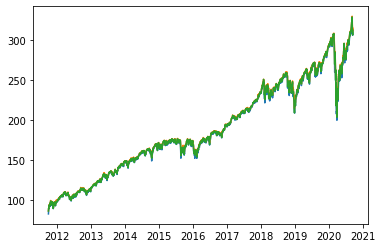

In [7]:
plt.plot(VOO['Low'])
plt.plot(VOO['High'])
plt.plot(VOO['Close'])

# ETFs

In [8]:
list_of_ETF_names =         ['IAU','LTPZ', 'VT','EDV','VCLT','EMLC','DBC','UVXY','AAPL','AMZN','GOOGL','JNJ','AVGO','PEP','PGF']
asset_fraction_RayDalio =   [ 0.05,   0.2, 0.35,  0.2, 0.075, 0.075, 0.05,   0.0,   0.0,   0.0,    0.0,  0.0,   0.0,  0.0,  0.0]
asset_fraction_PGF =        [    0,     0,    0,    0,     0,     0,    0,   0.0,  0.07, 0.145,  0.002,0.083,   0.0,  0.0,  0.7]
my_prior =        np.array( [    0,     0,    0, -0.2,     0,     0,    0,     0,     0,     0,    0.2,    0,     0,    0,  0.0] )
nETFs = len(list_of_ETF_names)


list_of_ETFs = []

for ETF_names in list_of_ETF_names:
  if ETF_names == 'CASH':
    tmp = yf.Ticker('VOO')
    tmp = tmp.history(start=start, end=end)
    tmp['Open'] = 1.0
    tmp['High'] = 1.0
    tmp['Low'] = 1.0
    tmp['Close'] = 1.0
    tmp['Volume'] = 1.0
    tmp['Dividends'] = 0.0
    tmp['Stock Splits'] = 0.0
    list_of_ETFs.append(tmp.copy())
  else:
    tmp = yf.Ticker(ETF_names)
    list_of_ETFs.append(tmp.history(start=start, end=end).copy())
    print(list_of_ETFs[-1].index[0], list_of_ETFs[-1].index[-1])

2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00
2011-10-04 00:00:00 2020-09-09 00:00:00


In [9]:
np.sum(asset_fraction_PGF)

1.0

In [10]:
def get_index(ETFname):
  for i,name in enumerate(list_of_ETF_names):
    if name==ETFname:
      return i

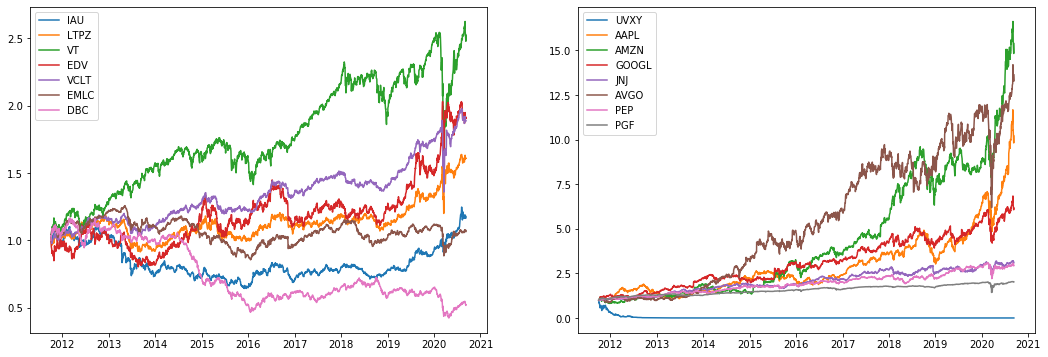

In [11]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
for item in list_of_ETFs[:int(nETFs/2)]:
  plt.plot(item['Close']/item['Close'][0])
plt.legend(list_of_ETF_names[:int(nETFs/2)])

plt.subplot(1,2,2)
for item in list_of_ETFs[int(nETFs/2):]:
  plt.plot(item['Close']/item['Close'][0])
plt.legend(list_of_ETF_names[int(nETFs/2):])

#### account dividend

In [12]:
for i,item in enumerate(list_of_ETFs):
  portfolio = pd.DataFrame(list_of_ETFs[0]['Close'].copy())
  portfolio['Close'] = 1.0
  asset_value = portfolio.iloc[0]['Close']
  for iDate in range(1,len(portfolio['Close'])):
    asset_value = portfolio.iloc[iDate-1]['Close']
    asset_value_change = 0
    changes_ratio = item.iloc[iDate]['Close']/item.iloc[iDate-1]['Close'] - 1.0
    asset_value_change = asset_value_change + asset_value*changes_ratio
    asset_value_change = asset_value_change + asset_value*item.iloc[iDate]['Dividends']/item.iloc[iDate]['Close']
    asset_value = asset_value + asset_value_change
    portfolio.iloc[iDate]['Close'] = asset_value
  list_of_ETFs[i] = portfolio

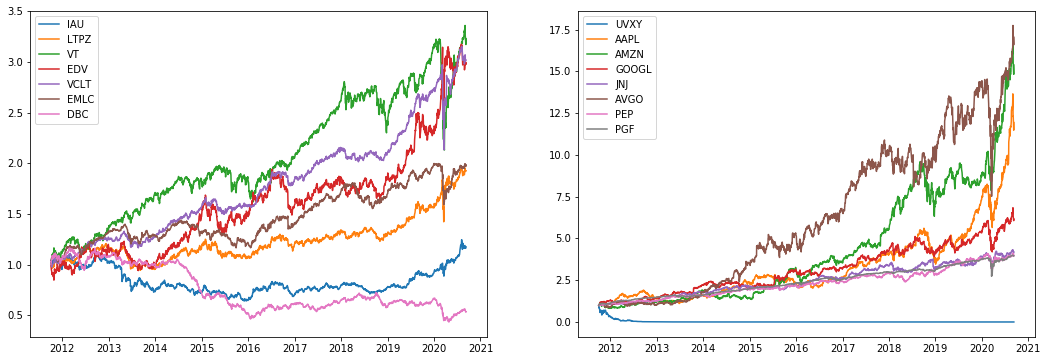

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
for item in list_of_ETFs[:int(nETFs/2)]:
  plt.plot(item['Close'])
plt.legend(list_of_ETF_names[:int(nETFs/2)])

plt.subplot(1,2,2)
for item in list_of_ETFs[int(nETFs/2):]:
  plt.plot(item['Close'])
plt.legend(list_of_ETF_names[int(nETFs/2):])

### get moving average (including future)

In [14]:
# Exponential Moving Average (EMA)
d_ave = 30  # half of averaging duration

def get_MA(asset_hist):
  MA = []
  for i in range(len(asset_hist)-2*d_ave):
    MA.append(np.mean(asset_hist[i:i+2*d_ave+1]))

  return pd.Series(MA,index=asset_hist.index[d_ave:len(asset_hist)-d_ave])

In [15]:
list_of_ETF_MA = []
for item in list_of_ETFs:
    item['MA'] = get_MA(item['Close'])

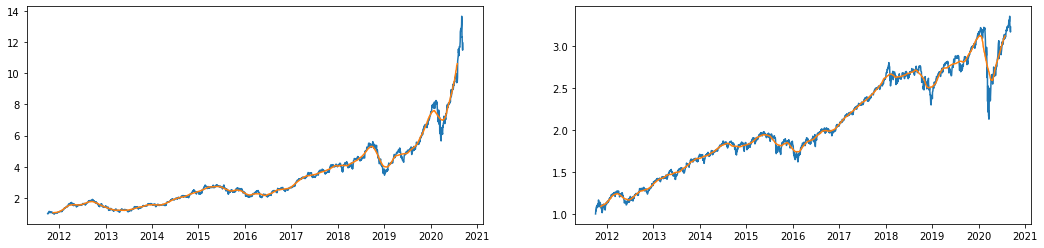

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
item = list_of_ETFs[get_index('AAPL')]
plt.plot(item['Close'])
plt.plot(item['MA'])

plt.subplot(1,2,2)
item = list_of_ETFs[get_index('VT')]
plt.plot(item['Close'])
plt.plot(item['MA'])

### Performance measure based on MA

In [17]:
epsilon = 0.015  # fractional tolerable volatility
dd = 100 # performance measure duration 

def get_performance_based_on_MA_test(item):
  asset_hist = item['Close']
  MA = item['MA'][d_ave:len(asset_hist)-d_ave]
  asset_hist = asset_hist[d_ave:len(asset_hist)-d_ave]
  DIFF = asset_hist/MA - 1.0
  plt.figure()
  plt.plot(asset_hist)
  plt.plot(MA)
  plt.plot(10*DIFF+1)
  
  performance = []
  for i in range(len(MA)-dd):
    performance.append( (asset_hist[i+dd]/asset_hist[i]-1.0) / (np.std(DIFF[i:i+dd])+epsilon) )
  plt.plot(asset_hist.index[dd:len(asset_hist)],0.1*np.array(performance)+1)
  return np.mean(performance*np.linspace(1,2.0,len(MA)-dd))/(np.std(performance)+10)


def get_performance_based_on_MA(item):
  asset_hist = item['Close']
  MA = item['MA'][d_ave:len(asset_hist)-d_ave]
  asset_hist = asset_hist[d_ave:len(asset_hist)-d_ave]
  DIFF = asset_hist/MA - 1.0
  performance = []
  for i in range(len(MA)-dd):
    performance.append( (asset_hist[i+dd]/asset_hist[i]-1.0) / (np.std(DIFF[i:i+dd])+epsilon) )
  return np.mean(performance*np.linspace(1,2.0,len(MA)-dd))/(np.std(performance)+10)

In [18]:
for i,item in enumerate(list_of_ETFs):
 print(list_of_ETF_names[i], get_performance_based_on_MA(item))

IAU 0.04176467879023761
LTPZ 0.13555241871932547
VT 0.19951415765438663
EDV 0.1982335363098322
VCLT 0.2414672544357141
EMLC 0.13315637910610206
DBC -0.08387053332366537
UVXY -0.2924073114365144
AAPL 0.26607792452223816
AMZN 0.32087296384327985
GOOGL 0.20545198974647272
JNJ 0.23057103747436938
AVGO 0.28432804950546176
PEP 0.24195444909789735
PGF 0.3196328282768048


### test RayDalio All Weather

In [19]:
def get_portfolio(asset_fraction):
  portfolio = pd.DataFrame(list_of_ETFs[0]['Close'].copy())
  portfolio['Close'] = 1.0
  
  asset_value = portfolio.iloc[0]['Close']
  for iDate in range(1,len(portfolio['Close'])):
    asset_value = portfolio.iloc[iDate-1]['Close']
    asset_value_change = 0
    for iETF,ETF in enumerate(list_of_ETFs):
      changes_ratio = ETF.iloc[iDate]['Close']/ETF.iloc[iDate-1]['Close'] - 1.0
      asset_value_change = asset_value_change + asset_value*asset_fraction[iETF]*changes_ratio
    asset_value = asset_value + asset_value_change
    portfolio.iloc[iDate]['Close'] = asset_value
    
  portfolio['MA'] = get_MA(portfolio['Close'])

  return portfolio

In [20]:
RayDalio = get_portfolio(asset_fraction_RayDalio)

0.20968750242850664

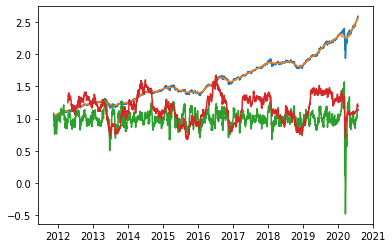

In [21]:
get_performance_based_on_MA_test(RayDalio)

0.19951415765438663

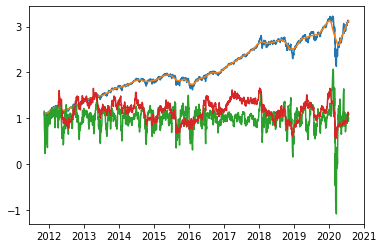

In [22]:
item = list_of_ETFs[get_index('VT')]
get_performance_based_on_MA_test(item)

### Optimize portfolio: 

In [23]:
from scipy import optimize
from copy import deepcopy as copy

In [24]:
def obj(asset_fraction):
  asset_fraction_tmp = np.array(asset_fraction)
  asset_fraction_tmp = asset_fraction_tmp/np.sum(asset_fraction_tmp)
  portfolio = get_portfolio(asset_fraction_tmp)
  performance = get_performance_based_on_MA(portfolio)
  return -performance*(1.0 + np.sum(asset_fraction_tmp*my_prior))

In [25]:
list_of_ETF_names

['IAU',
 'LTPZ',
 'VT',
 'EDV',
 'VCLT',
 'EMLC',
 'DBC',
 'UVXY',
 'AAPL',
 'AMZN',
 'GOOGL',
 'JNJ',
 'AVGO',
 'PEP',
 'PGF']

In [26]:
bounds = [(0.0,1.0) for i in range(len(list_of_ETF_names))]

In [27]:
# result = optimize.differential_evolution(obj,bounds,disp=True,popsize=12,workers=30)

In [28]:
# asset_fraction = result.x/np.sum(result.x)

asset_fraction = np.array([0.        , 0.        , 0.        , 0.13874189, 0.13598113,
       0.        , 0.        , 0.        , 0.06210345, 0.24755772,
       0.08753718, 0.11857195, 0.18150388, 0.0280028, 0.0])

In [29]:
asset_fraction

array([0.        , 0.        , 0.        , 0.13874189, 0.13598113,
       0.        , 0.        , 0.        , 0.06210345, 0.24755772,
       0.08753718, 0.11857195, 0.18150388, 0.0280028 , 0.        ])

In [30]:
for i,ETFname in enumerate(list_of_ETF_names):
    print(ETFname,asset_fraction[i])

IAU 0.0
LTPZ 0.0
VT 0.0
EDV 0.13874189
VCLT 0.13598113
EMLC 0.0
DBC 0.0
UVXY 0.0
AAPL 0.06210345
AMZN 0.24755772
GOOGL 0.08753718
JNJ 0.11857195
AVGO 0.18150388
PEP 0.0280028
PGF 0.0


In [31]:
portfolio = get_portfolio(asset_fraction)
asset_fraction_RayDalio = np.array(asset_fraction_RayDalio)
portfolio73 = get_portfolio(0.7*asset_fraction+0.3*asset_fraction_RayDalio)
asset_fraction_PGF = np.array(asset_fraction_PGF)
portfolio631 = get_portfolio(0.6*asset_fraction+0.3*asset_fraction_RayDalio+0.1*asset_fraction_PGF)

In [32]:
Cheap = get_portfolio(asset_fraction_PGF)

(0.3233948427891792, 14.28736001536184)

<Figure size 864x288 with 0 Axes>

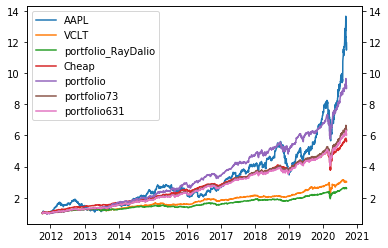

In [42]:
plt.figure(figsize=(12,4))
fig,ax = plt.subplots()
item = list_of_ETFs[get_index('AAPL')]
plt.plot(item['Close'])
item = list_of_ETFs[get_index('VCLT')]
plt.plot(item['Close'])

plt.plot(RayDalio['Close'])
plt.plot(Cheap['Close'])
plt.plot(portfolio['Close'])
plt.plot(portfolio73['Close'])
plt.plot(portfolio631['Close'])

plt.legend(['AAPL','VCLT','portfolio_RayDalio','Cheap','portfolio','portfolio73','portfolio631'])

ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())

(0.693481534809602, 6.932216154951759)

<Figure size 864x288 with 0 Axes>

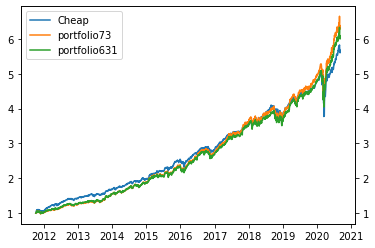

In [43]:
plt.figure(figsize=(12,4))
fig,ax = plt.subplots()
plt.plot(Cheap['Close'])
plt.plot(portfolio73['Close'])
plt.plot(portfolio631['Close'])

plt.legend(['Cheap','portfolio73','portfolio631'])

ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())

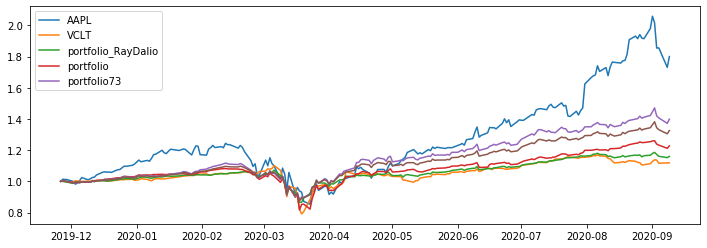

In [34]:
d_from = 2050

plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('AAPL')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('VCLT')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])

plt.plot(RayDalio['Close'][d_from:]/RayDalio['Close'][d_from])
plt.plot(Cheap['Close'][d_from:]/Cheap['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])
plt.plot(portfolio73['Close'][d_from:]/portfolio73['Close'][d_from])

plt.legend(['AAPL','VCLT','portfolio_RayDalio','portfolio','portfolio73'])

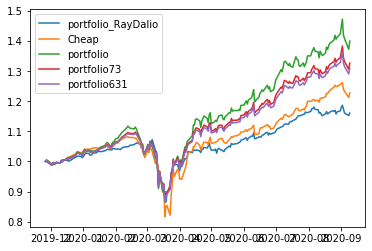

In [45]:
d_from = 2050

plt.plot(RayDalio['Close'][d_from:]/RayDalio['Close'][d_from])
plt.plot(Cheap['Close'][d_from:]/Cheap['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])
plt.plot(portfolio73['Close'][d_from:]/portfolio73['Close'][d_from])
plt.plot(portfolio631['Close'][d_from:]/portfolio631['Close'][d_from])

plt.legend(['portfolio_RayDalio','Cheap','portfolio','portfolio73','portfolio631'])

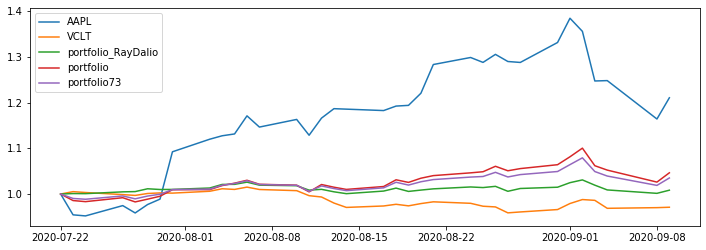

In [35]:
d_from = 2213

plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('AAPL')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('VCLT')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])

plt.plot(RayDalio['Close'][d_from:]/RayDalio['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])
plt.plot(portfolio73['Close'][d_from:]/portfolio73['Close'][d_from])

plt.legend(['AAPL','VCLT','portfolio_RayDalio','portfolio','portfolio73'])

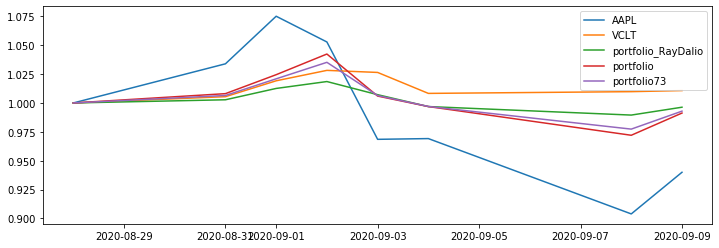

In [36]:
d_from = 2240

plt.figure(figsize=(12,4))
item = list_of_ETFs[get_index('AAPL')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])
item = list_of_ETFs[get_index('VCLT')]
plt.plot(item['Close'][d_from:]/item['Close'][d_from])

plt.plot(RayDalio['Close'][d_from:]/RayDalio['Close'][d_from])
plt.plot(portfolio['Close'][d_from:]/portfolio['Close'][d_from])
plt.plot(portfolio73['Close'][d_from:]/portfolio73['Close'][d_from])

plt.legend(['AAPL','VCLT','portfolio_RayDalio','portfolio','portfolio73'])

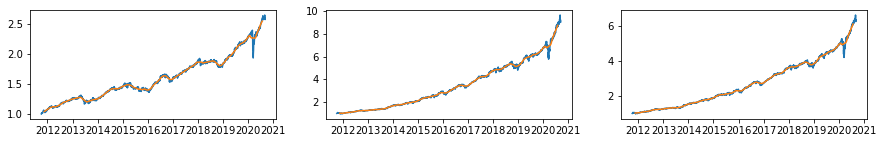

In [37]:
plt.figure(figsize=(15,2))
plt.subplot(1,3,1)
plt.plot(RayDalio['Close'])
plt.plot(RayDalio['MA'])

plt.subplot(1,3,2)
plt.plot(portfolio['Close'])
plt.plot(portfolio['MA'])

plt.subplot(1,3,3)
plt.plot(portfolio73['Close'])
plt.plot(portfolio73['MA'])

# From ratio to number of shares

In [38]:
prices = []
for ETFname in list_of_ETF_names:
    if ETFname == 'CASH':
        prices.append(1.0)
    else:
        prices.append(si.get_live_price(ETFname))
    print(ETFname, prices[-1])

IAU 18.600000381469727
LTPZ 87.5199966430664
VT 81.77999877929688
EDV 165.74000549316406
VCLT 107.51000213623047
EMLC 31.440000534057617
DBC 12.9399995803833
UVXY 22.440000534057617
AAPL 117.31999969482422
AMZN 3268.610107421875
GOOGL 1547.22998046875
JNJ 149.6999969482422
AVGO 360.0299987792969
PEP 137.11000061035156
PGF 18.709999084472656


In [39]:
len(list_of_ETFs)

15

In [40]:
def get_portfolio_shares(asset_Value,asset_fraction,prices):
    shares = {}
    for i,ETFname in enumerate(list_of_ETF_names):
        shares[ETFname]=asset_Value*asset_fraction[i]/prices[i]
    return shares

### optimized portfolio shares

In [41]:
shares = get_portfolio_shares(16000,0.7*asset_fraction+0.3*asset_fraction_RayDalio,prices)
shares

{'IAU': 12.903225541817747,
 'LTPZ': 10.968921810122739,
 'VT': 20.542920335984434,
 'EDV': 15.167787406062839,
 'VCLT': 17.514543936237533,
 'EMLC': 11.450381484886659,
 'DBC': 18.547141250594297,
 'UVXY': 0.0,
 'AAPL': 5.928730325684493,
 'AMZN': 0.8482646669005537,
 'GOOGL': 0.6336591381864073,
 'JNJ': 8.87111467650296,
 'AVGO': 5.64631687051767,
 'PEP': 2.287443356457263,
 'PGF': 0.0}